In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#load in data for PA counties
coviddat = pd.read_csv('us-counties-2022.csv')

PAcoviddat = coviddat[coviddat['state'] == 'Pennsylvania']
PAcoviddat = PAcoviddat[PAcoviddat['date'] == '2022-10-15']
print(PAcoviddat)
popdensitydatall = pd.read_csv('Popdensity.csv')
popdensitydat = popdensitydatall[['State', 'NAME', 'density']]
PAdensitydat = popdensitydat[popdensitydat['State'] == 'Pennsylvania']
print(PAdensitydat)

PAginidat = pd.read_csv('Ginidat.csv')

countarr = np.arange(1,68)

              date        county         state     fips   cases  deaths
936534  2022-10-15         Adams  Pennsylvania  42001.0   29031   395.0
936535  2022-10-15     Allegheny  Pennsylvania  42003.0  320559  3567.0
936536  2022-10-15     Armstrong  Pennsylvania  42005.0   17323   372.0
936537  2022-10-15        Beaver  Pennsylvania  42007.0   46424   781.0
936538  2022-10-15       Bedford  Pennsylvania  42009.0   12241   283.0
...            ...           ...           ...      ...     ...     ...
936596  2022-10-15    Washington  Pennsylvania  42125.0   60439   691.0
936597  2022-10-15         Wayne  Pennsylvania  42127.0   12129   183.0
936598  2022-10-15  Westmoreland  Pennsylvania  42129.0   93270  1470.0
936599  2022-10-15       Wyoming  Pennsylvania  42131.0    6076   115.0
936600  2022-10-15          York  Pennsylvania  42133.0  137108  1582.0

[67 rows x 6 columns]
             State                 NAME     density
2244  Pennsylvania         Adams County   75.933457
2245  Pen

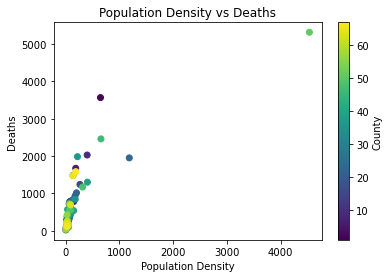

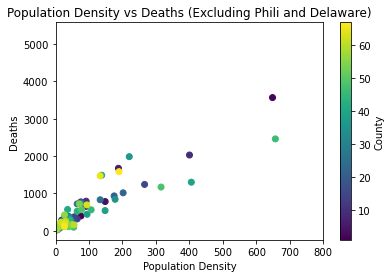

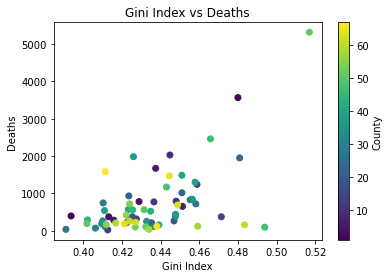

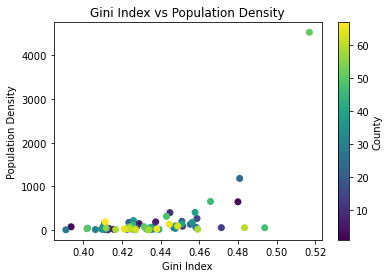

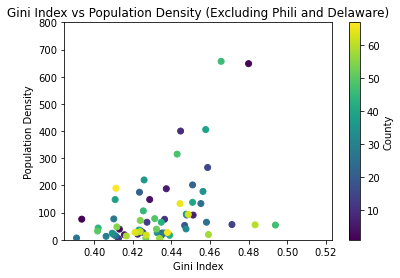

In [23]:
#Plot of pop density vs deaths
plt.scatter(PAdensitydat['density'],PAcoviddat['deaths'], c = countarr)
plt.xlabel("Population Density")
plt.ylabel("Deaths")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Population Density vs Deaths')
plt.show()

##plot of population density vs deaths excluding Philidelphia and Delaware (to get a better view at lower points trend)
plt.scatter(PAdensitydat['density'],PAcoviddat['deaths'], c = countarr)
plt.xlabel("Population Density")
plt.ylabel("Deaths")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Population Density vs Deaths (Excluding Phili and Delaware)')
plt.xlim([0,800])
plt.show()

#Plot of gini index vs deaths
plt.scatter(PAginidat['Gini'],PAcoviddat['deaths'], c = countarr)
plt.xlabel("Gini Index")
plt.ylabel("Deaths")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Gini Index vs Deaths')
plt.show()

#plot gini index vs population density
plt.scatter(PAginidat['Gini'],PAdensitydat['density'], c = countarr)
plt.xlabel("Gini Index")
plt.ylabel("Population Density")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Gini Index vs Population Density')
plt.show()

#plot of gini index vs population density excluding Philidelphia and Delaware (to get a better view at lower points trend)
plt.scatter(PAginidat['Gini'],PAdensitydat['density'], c = countarr)
plt.xlabel("Gini Index")
plt.ylabel("Population Density")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Gini Index vs Population Density (Excluding Phili and Delaware)')
plt.ylim([0,800])
plt.show()

Since Pennsylvania is a large state with 67 counties, there are more than enough data points in order to conduct analysis through t/u-tests. Population density and gini index does not seem to show much dependence, at most there may be a slight upward trend. Although, some of the higher gini indexs are at a sub 100 population density.